In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# pd.set_option('display.max_rows', None)
df = pd.read_csv('./stats-redirect.csv')

In [55]:
df

,port,duration,pkt_size,rate,mbps,mpps,loss
0,0,60,64,1.0,179.4048,0.3738,0.0000
1,1,60,64,1.0,179.4043,0.3738,0.0000
2,2,60,64,1.0,179.4052,0.3738,0.0000
3,3,60,64,1.0,179.4047,0.3738,0.0000
4,0,60,64,2.0,352.7225,0.7348,0.0083
...,...,...,...,...,...,...,...
727,3,60,1024,83.0,1193.8312,2.4871,0.1042
728,0,60,1024,84.0,535.3361,1.1153,55.7842
729,1,60,1024,84.0,562.9965,1.1729,53.4997
730,2,60,1024,84.0,1207.6437,2.5159,0.1115


In [56]:
df.columns = df.columns.str.replace(' ','')
df = df.drop(['duration','rate','mbps'], axis=1)
df = df.sort_values(by=['pkt_size','port'],ignore_index=True)

In [57]:
def transfrm(x):
    if (x == 0 or x == 1):
        return 'ARM'
    else:
        return 'Intel'

In [58]:
df['port'] = df['port'].apply(transfrm)
df

,port,pkt_size,mpps,loss
0,ARM,64,0.3738,0.0000
1,ARM,64,0.7348,0.0083
2,ARM,64,1.1060,1.3354
3,ARM,64,1.1826,20.8417
4,ARM,64,1.0834,40.9852
...,...,...,...,...
727,Intel,1024,2.3985,0.0893
728,Intel,1024,2.4268,0.1090
729,Intel,1024,2.4161,0.0764
730,Intel,1024,2.4871,0.1042


In [59]:
is_low_loss = df['loss']<=0.1
df_low_loss = df[is_low_loss]
df_low_loss

,port,pkt_size,mpps,loss
0,ARM,64,0.3738,0.0000
1,ARM,64,0.7348,0.0083
9,ARM,64,0.3738,0.0000
10,ARM,64,0.7348,0.0084
18,Intel,64,0.3738,0.0000
...,...,...,...,...
724,Intel,1024,2.3093,0.0840
725,Intel,1024,2.3389,0.0639
726,Intel,1024,2.3289,0.0861
727,Intel,1024,2.3985,0.0893


In [60]:
df_low_loss.groupby(['port','pkt_size']).mean()
df_low_loss

,port,pkt_size,mpps,loss
0,ARM,64,0.3738,0.0000
1,ARM,64,0.7348,0.0083
9,ARM,64,0.3738,0.0000
10,ARM,64,0.7348,0.0084
18,Intel,64,0.3738,0.0000
...,...,...,...,...
724,Intel,1024,2.3093,0.0840
725,Intel,1024,2.3389,0.0639
726,Intel,1024,2.3289,0.0861
727,Intel,1024,2.3985,0.0893


In [61]:
df_low_loss = df_low_loss.drop(['loss'], axis=1)
df_low_loss

,port,pkt_size,mpps
0,ARM,64,0.3738
1,ARM,64,0.7348
9,ARM,64,0.3738
10,ARM,64,0.7348
18,Intel,64,0.3738
...,...,...,...
724,Intel,1024,2.3093
725,Intel,1024,2.3389
726,Intel,1024,2.3289
727,Intel,1024,2.3985


In [62]:
perf = df_low_loss.pivot_table(index='pkt_size',values='mpps', columns='port',)
perf

port,ARM,Intel
pkt_size,,
64,0.554300,1.666319
128,0.528475,1.691137
256,0.491040,1.639788
512,0.487055,1.233290
1024,0.426862,1.233074


<Figure size 480x360 with 0 Axes>

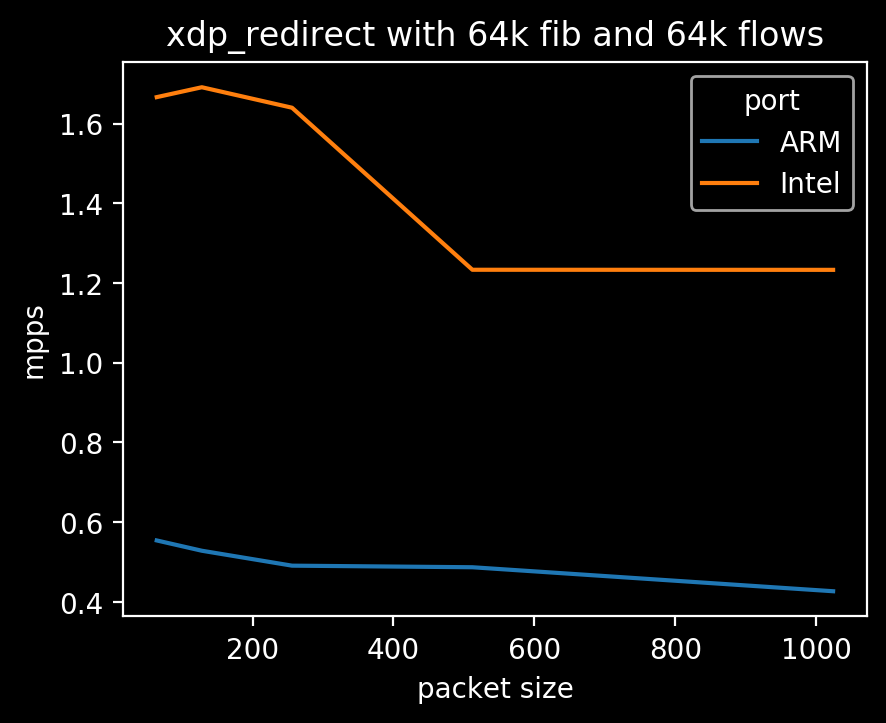

In [63]:
f = plt.figure()
ax = perf.plot(title='xdp_redirect with 64k fib and 64k flows')
ax.set_xlabel('packet size')
ax.set_ylabel('mpps')
plt.show()

In [64]:
perf

port,ARM,Intel
pkt_size,,
64,0.554300,1.666319
128,0.528475,1.691137
256,0.491040,1.639788
512,0.487055,1.233290
1024,0.426862,1.233074


In [65]:
mpps_per_watt = perf
mpps_per_watt['ARM'] = mpps_per_watt['ARM'].div(1.6876)
mpps_per_watt['Intel'] = mpps_per_watt['Intel'].div(6.875)
mpps_per_watt

port,ARM,Intel
pkt_size,,
64,0.328455,0.242374
128,0.313152,0.245984
256,0.290969,0.238515
512,0.288608,0.179388
1024,0.252940,0.179356


<Figure size 480x360 with 0 Axes>

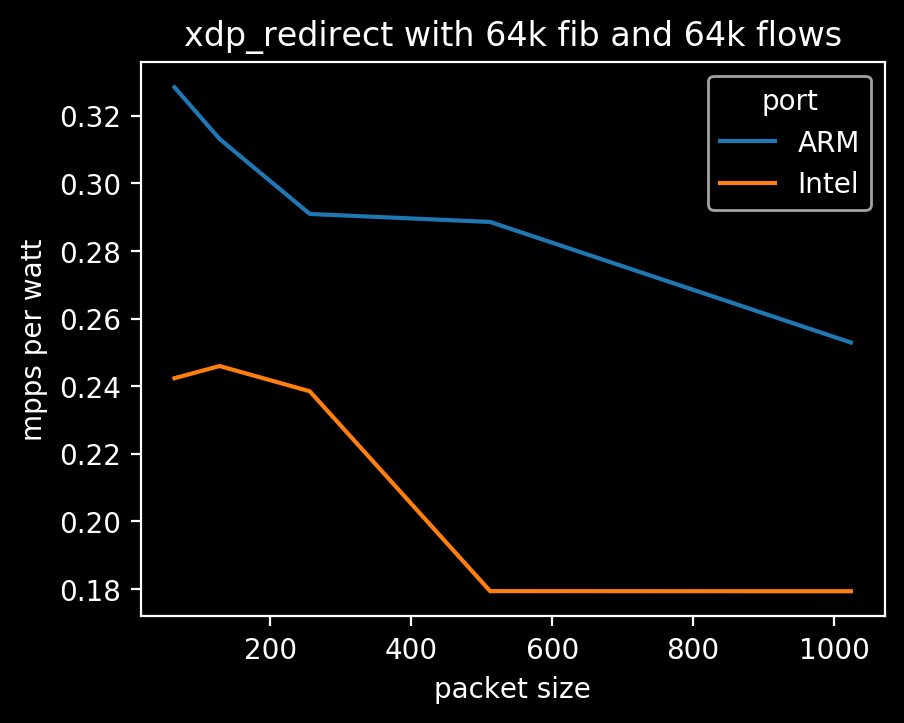

In [66]:
f = plt.figure()
ax = perf.plot(title='xdp_redirect with 64k fib and 64k flows')
ax.set_xlabel('packet size')
ax.set_ylabel('mpps per watt')
plt.show()